In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import utils
import numpy as np
pd.set_option('display.max_rows', 50)
dado = utils.carregar_dados_todos_anos()
from pprint import pprint

In [66]:
base = 1000000

colunas_analisadas = ['numAno', 'numMes', 'vlrDocumento', 'vlrLiquido']
analise = dado[colunas_analisadas]
analise_por_mes = analise.groupby(['numAno', 'numMes']).sum()

NameError: name 'minimo' is not defined

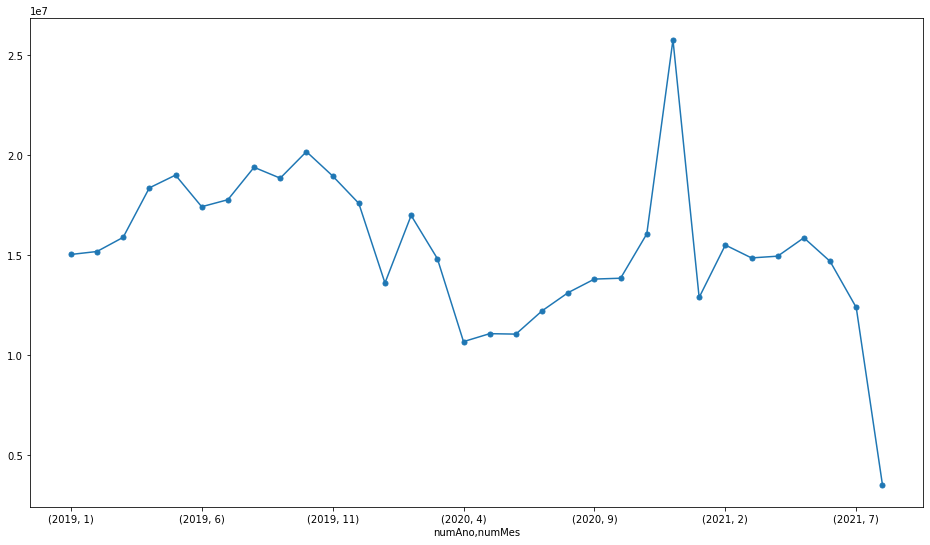

In [67]:
fig, ax = plt.subplots()
fig.patch.set_facecolor('white')

analise_por_mes.vlrDocumento.plot(style='-o', ax=ax, figsize=(16, 9), ms=5)

indices = analise_por_mes.index.to_frame()
indices = indices.numMes.astype(str) + '/' + indices.numAno.astype(str)
indices = indices.to_numpy()
indices = utils.formatar_datas_para_rotulo(pd.Series(indices))

min_y, max_y = utils.gerar_limites_eixo_y(
    analise_por_mes.vlrDocumento.to_numpy())
yticks = np.linspace(minimo, maximo, 7)

ax.set_xticks(range(len(indices)))
ax.set_xticklabels(indices, rotation=90)
ax.grid(color=(1, 0.2, 0.5, 0.3), linestyle=':', linewidth=0.25)
ax.set_ylim([min_y, max_y])
ax.set_xlabel('Mês-Ano', fontsize=15)
ax.set_ylabel(
    'Gastos De Todos os Deputados no Período entre 01/2019 e 08/2021', fontsize=15)

ax.set_yticks(yticks)

yticks = [f'R$ {x/1000000}M' for x in yticks]
ax.set_yticklabels(yticks)

valores = analise_por_mes.vlrDocumento.to_numpy()
valores = np.concatenate(([max_y], valores, [max_y]))

direcao_desvio = np.sign(np.diff(valores))
direcao_desvio[[2, 19, 21, 22, 27]] = -1
direcao_desvio[[10, 11, 14, 20, 26, 29, 30]] = 1
desvios = direcao_desvio * (max_y/30)

interate = zip(desvios, analise_por_mes.vlrDocumento.to_numpy())


for eixo_x, (desvio_y, valor) in enumerate(interate):
    valor_sem_resto = valor - (valor % (base/100))
    coordenadas = (eixo_x, valor_sem_resto + desvio_y)
    ax.annotate(f'{(valor_sem_resto/base):4.2f}M',
                coordenadas, fontsize=8, ha='center')

plt.savefig('Gasto Total sem Barra Vertical.png', dpi=150, bbox_inches='tight')
plt.bar([23, 15], [max_y, max_y], color=['#ffcccc', '#ccffcc'])
plt.savefig('Gasto Total com Barra Vertical.png', dpi=150, bbox_inches='tight')
plt.show()


25760481.34


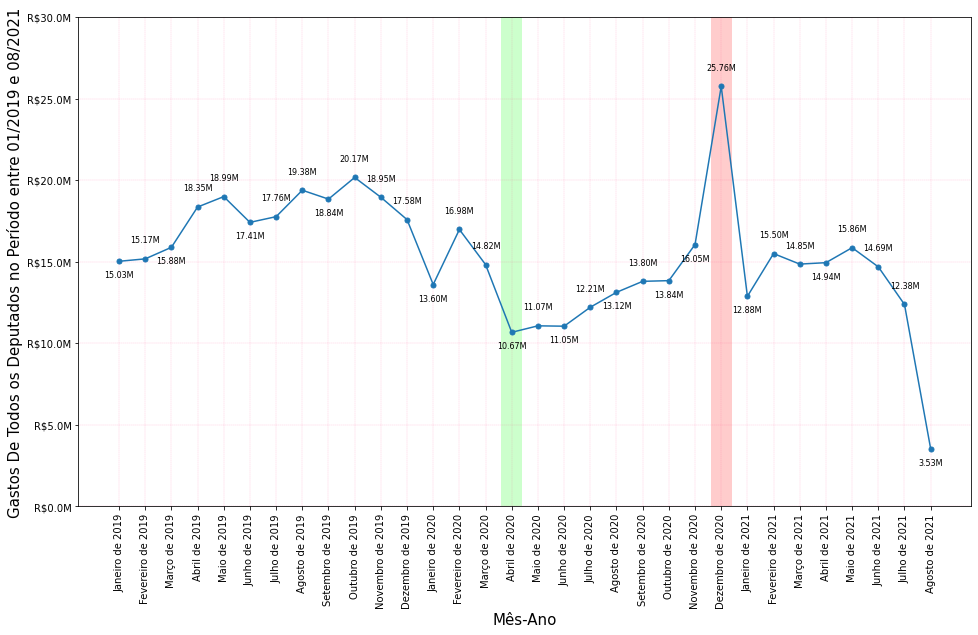

In [ ]:
fig, ax = plt.subplots()
fig.patch.set_facecolor('white')

analise_por_mes.vlrDocumento.plot(style='-o', ax=ax, figsize=(16, 9), ms=5)

indices = analise_por_mes.index.to_frame()
indices = indices.numMes.astype(str) + '/' + indices.numAno.astype(str)
indices = utils.formatar_datas_para_rotulo(pd.Series(indices))

utils.configurar_yticks(analise_por_mes.vlrDocumento, ax, 7, 'R${}M', 1000000)

ax.set_xticks(range(len(indices)))
ax.set_xticklabels(indices, rotation=90)


ax.grid(color=(1, 0.2, 0.5, 0.3), linestyle=':', linewidth=0.25)
ax.set_xlabel('Mês-Ano', fontsize=15)
ax.set_ylabel(
    'Gastos De Todos os Deputados no Período entre 01/2019 e 08/2021', fontsize=15)



valores = analise_por_mes.vlrDocumento.to_numpy()
print(max(valores))
valores = np.concatenate(([max(valores)], valores))

direcao_desvio = np.sign(np.diff(valores))
direcao_desvio[[2, 19, 21, 22, 27]] = -1
direcao_desvio[[10, 11, 14, 20, 26, 29, 30]] = 1
desvios = direcao_desvio * (max_y/30)

interate = zip(desvios, analise_por_mes.vlrDocumento.to_numpy())


for eixo_x, (desvio_y, valor) in enumerate(interate):
    valor_sem_resto = valor - (valor % (base/100))
    coordenadas = (eixo_x, valor_sem_resto + desvio_y)
    ax.annotate(f'{(valor_sem_resto/base):4.2f}M',
                coordenadas, fontsize=8, ha='center')

plt.savefig('Gasto Total sem Barra Vertical.png', dpi=150, bbox_inches='tight')
plt.bar([23, 15], [max_y, max_y], color=['#ffcccc', '#ccffcc'])
plt.savefig('Gasto Total com Barra Vertical.png', dpi=150, bbox_inches='tight')
plt.show()

In [ ]:
dado.head().T

,0,1,2,3,4
txNomeParlamentar,LID.GOV-CD,LID.GOV-CD,LID.GOV-CD,LID.GOV-CD,LID.GOV-CD
cpf,NaN,NaN,NaN,NaN,NaN
ideCadastro,NaN,NaN,NaN,NaN,NaN
nuCarteiraParlamentar,NaN,NaN,NaN,NaN,NaN
nuLegislatura,2015,2019,2019,2019,2019
sgUF,NaN,NaN,NaN,NaN,NaN
sgPartido,NaN,NaN,NaN,NaN,NaN
codLegislatura,55,56,56,56,56
numSubCota,13,13,13,13,13
txtDescricao,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR


In [ ]:
colunas_analisadas = ['txtFornecedor', 'txtCNPJCPF']

df = dado[colunas_analisadas]
df.drop_duplicates().groupby('txtFornecedor').count().sort_values(by='txtCNPJCPF')

,txtCNPJCPF
txtFornecedor,
GOL,0
"""EMBAIXADA GASTRONOMICA BAR",1
PB Marketing-Priscilla de Cassia Portela Vinhote,1
PBJM COMERCIO DE GENEROS ALIMENTICIOS LTDA,1
PBJM COMERCIO DE GENEROS ALIMENTICIOS LTDA - EPP,1
...,...
ARCOS DOURADOS COMERCIO DE ALIMENTOS LTDA,46
ECT,49
SIM REDE DE POSTOS LTDA,56


In [ ]:
filtro = df.txtFornecedor == 'CASCOL COMBUSTIVEIS PARA VEICULOS LTDA'
df[filtro].drop_duplicates()

,txtFornecedor,txtCNPJCPF
302,CASCOL COMBUSTIVEIS PARA VEICULOS LTDA,003.065.970/0214-0
467,CASCOL COMBUSTIVEIS PARA VEICULOS LTDA,003.065.970/0079-2
468,CASCOL COMBUSTIVEIS PARA VEICULOS LTDA,003.065.970/0761-4
927,CASCOL COMBUSTIVEIS PARA VEICULOS LTDA,003.065.970/0699-5
936,CASCOL COMBUSTIVEIS PARA VEICULOS LTDA,003.065.970/0192-6
...,...,...
243303,CASCOL COMBUSTIVEIS PARA VEICULOS LTDA,003.065.970/0648-0
273062,CASCOL COMBUSTIVEIS PARA VEICULOS LTDA,003.065.970/0893-9
282944,CASCOL COMBUSTIVEIS PARA VEICULOS LTDA,003.065.970/0443-7
314143,CASCOL COMBUSTIVEIS PARA VEICULOS LTDA,003.065.970/0788-6


In [ ]:
dado.txtFornecedor.unique().shape

(36914,)

In [ ]:
colunas_analisadas = ['txtFornecedor', 'txtCNPJCPF']
filtro = dado.txtFornecedor.str.startswith('PBJM').fillna(False)
dado[colunas_analisadas][filtro].drop_duplicates()

,txtFornecedor,txtCNPJCPF
1739,PBJM COMERCIO DE GENEROS ALIMENTICIOS LTDA,090.541.580/0011-9
123632,PBJM COMERCIO DE GENEROS ALIMENTICIOS LTDA - EPP,090.541.580/0011-9


In [ ]:
dado.txtFornecedor

0                        CRISTIANE FERREIRA EPP
1                        CRISTIANE FERREIRA EPP
2                        CRISTIANE FERREIRA EPP
3                        CRISTIANE FERREIRA EPP
4         PANIFICADORA FERREIRA NETO LTDA - EPP
                          ...                  
555495      FABIO FRERICHS TREVISAN PUBLICIDADE
555496                   LAR COMUNICAÇÃO VISUAL
555497                   LAR COMUNICAÇÃO VISUAL
555498                                    RAMAL
555499                                    RAMAL
Name: txtFornecedor, Length: 555500, dtype: object

In [ ]:
colunas_analisadas = ['txtFornecedor', 'txtCNPJCPF']

df = dado[colunas_analisadas]
df.drop_duplicates().groupby('txtCNPJCPF').count().sort_values(by='txtFornecedor')

,txtFornecedor
txtCNPJCPF,
155.110.310/0018-4,0
000.000.000/00 -,1
238.305.280/0019-3,1
238.305.230/0016-0,1
238.303.140/0011-7,1
...,...
404.325.440/0782-6,15
404.325.440/4400-4,18
000.000.000/0000-7,36


In [ ]:
pag = 5
num_pag = 50

colunas_analisadas = ['txtFornecedor', 'txtCNPJCPF', 'txtDescricao']
filtro = dado.txtCNPJCPF == '000.000.000/0001-0'
dado[colunas_analisadas][filtro].drop_duplicates().sort_values('txtFornecedor')[num_pag*pag:num_pag*(pag+1)]

,txtFornecedor,txtCNPJCPF,txtDescricao
479154,Streamyard Inc,000.000.000/0001-0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...
412273,"Streamyard, INC",000.000.000/0001-0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...
412274,"Streamyard, Inc",000.000.000/0001-0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...
402276,"Streamyard, Inc.",000.000.000/0001-0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...
341293,"Streamyard, Inc.",000.000.000/0001-0,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.
531087,Streamyard.com,000.000.000/0001-0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...
184963,Strikingly,000.000.000/0001-0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...
84375,TAM LINHAS AEREAS S/A.,000.000.000/0001-0,PASSAGEM AÉREA - REEMBOLSO
187645,TAM LINHAS AÉREAS S/A,000.000.000/0001-0,PASSAGEM AÉREA - REEMBOLSO
81001,TAP TRANSPORTES AÉREOS PORTUGAL,000.000.000/0001-0,PASSAGEM AÉREA - REEMBOLSO


In [ ]:
colunas_analisadas = ['txtFornecedor', 'txtCNPJCPF']
filtro = dado.txtCNPJCPF == '025.581.570/0016-2'
dado[colunas_analisadas][filtro].drop_duplicates().txtFornecedor

933         Telefônica Brasil S. A. VIVO
1012         Telefônia Brasil S/A - VIVO
1333              TELEFONICA BRASIL S.A.
1334       TELEFÔNICA BRASIL S.A. - VIVO
1335         TELEFÔNICA BRASIL S.A. VIVO
                       ...              
451624     TELEFONICA BRASIL S.A. - VIVO
470812          Telefônica do Brasil S.A
479342        CRISTIANE LAD[ARIA PACHECO
494924    aluisio guimaraes mendes filho
510748     TELEFÔÑICA BRASIL S. A. VIVO.
Name: txtFornecedor, Length: 61, dtype: object

In [146]:
colunas_analisadas = ['txtCNPJCPF', 'vlrLiquido', 'vlrDocumento']
df = dado[colunas_analisadas]
gpcnpj = utils.soma_gastos(df).sort_values('vlrLiquido')
gpcnpj

,txtCNPJCPF,vlrLiquido,vlrDocumento
11454,094.207.500/0035-9,0.03,285.08
24582,301.590.080/0016-6,2.20,2.20
22313,262.461.830/0216-7,2.99,2.99
18084,185.722.250/0026-9,3.30,3.30
9986,082.941.860/0014-0,3.50,3.50
...,...,...,...
2816,025.581.570/0016-2,5353776.88,5459504.33
8617,073.193.230/0019-1,6328718.78,6333604.18
11271,092.962.950/0016-0,9268350.41,9269181.03
9029,075.756.510/0015-9,30501246.64,30504710.02


In [ ]:
colunas_analisadas = ['txtFornecedor', 'txtCNPJCPF', 'txtDescricao']
empresa_maior_gasto = utils.buscar_por_cnpj(dado, '020.128.620/0016-0')
empresa_maior_gasto[colunas_analisadas]

,txtFornecedor,txtCNPJCPF,txtDescricao
429,TAM LINHAS AEREAS S/A.,020.128.620/0016-0,PASSAGEM AÉREA - REEMBOLSO
430,TAM LINHAS AEREAS S/A.,020.128.620/0016-0,PASSAGEM AÉREA - REEMBOLSO
431,TAM LINHAS AEREAS S/A.,020.128.620/0016-0,PASSAGEM AÉREA - REEMBOLSO
568,Latam Airlines,020.128.620/0016-0,PASSAGEM AÉREA - REEMBOLSO
569,LATAM AIRLINES,020.128.620/0016-0,PASSAGEM AÉREA - REEMBOLSO
...,...,...,...
555133,Cia Aérea - TAM,020.128.620/0016-0,PASSAGEM AÉREA - RPA
555137,Cia Aérea - TAM,020.128.620/0016-0,PASSAGEM AÉREA - RPA
555153,LATAM,020.128.620/0016-0,PASSAGEM AÉREA - REEMBOLSO
555271,LATAM,020.128.620/0016-0,PASSAGEM AÉREA - REEMBOLSO


In [ ]:
cnpj_filial = dado.txtCNPJCPF.str.split('/', expand=True)

cnpj_filial.drop_duplicates()

,0,1
0,037.139.030,0010-8
6,305.615.740,0010-8
7,072.867.310,0019-4
15,307.711.930,0014-5
16,277.575.530,0014-0
...,...,...
555488,016.193.890,0011-0
555490,463.968.260,0011-2
555492,285.180.700,0015-5
555494,151.600.920,0014-4


In [123]:
d = dict()

fornecedores = dado.txtFornecedor.drop_duplicates().dropna()


fornecedores = fornecedores.str.replace('-', ' ')
fornecedores = fornecedores.str.replace(':', ' ')
fornecedores = fornecedores.str.replace('/', ' ')
fornecedores = fornecedores.str.replace('"', ' ')
fornecedores = fornecedores.str.replace("'", ' ')
fornecedores = fornecedores.str.replace('(', ' ', regex=False)
fornecedores = fornecedores.str.replace(')', ' ', regex=False)

In [124]:
for fornecedor in fornecedores:
    for palavra in fornecedor.lower().split():
        if palavra not in d.keys():
            d[palavra] = [fornecedor]
        
        else:
            d[palavra].append(fornecedor)
        #se chave existir, adicionar no dict
    

In [137]:
ks = sorted(d, key = lambda key: len(d[key]), reverse=True)

ksl = [len (x) for x in ks] 

print(len(ksl))

pag = 1
num_pag = 50

for k in ks[(pag-1)*num_pag:pag*num_pag]:
    print(f'{k}', len(d[k]))

22412
ltda 19937
de 10960
posto 8495
e 6368
auto 4229
comercio 3002
me 2994
combustiveis 2575
eireli 2501
hotel 1628
restaurante 1365
ltda. 1293
epp 1266
& 1259
da 1258
do 1228
petroleo 1064
servicos 892
a 836
cia 810
silva 799
s 793
alimentos 789
derivados 679
comercial 670
santos 532
dos 524
serviços 482
oliveira 423
editora 421
lt 416
brasil 409
comunicacao 402
com 399
m 369
empreendimentos 355
radio 341
comunicação 331
j 327
sociedade 326
souza 323
combustivel 310
comb 308
veiculos 307
grafica 298
sao 288
churrascaria 284
rede 283
consultoria 276
informatica 266


In [91]:
d['adobe']

['Adobe Systems Software',
 'ADOBE SYSTEMS SOFTWARE',
 'ADOBE SYSTEMS',
 'ADOBE SYSTEMS BRASIL LTDA.',
 'Adobe Systems Software Ireland Ltd',
 'ADOBE SYSTEMS SOFTWARE IRELAND LTD',
 'Adobe Systems Software Ireland Ltda',
 'Adobe System Software',
 'adobe systems software',
 'Adobe',
 'ADOBE SYSTEMS SOFTWARE IRELAND LTDA',
 'Adobe Systems Softwares',
 'Adobe System',
 'Adobe SyAdobe Systems Softwarestems Software',
 'Adobe e Systems Software Ireland Ltd',
 'adobe Systems Software',
 'Adobe Systems Softwre',
 'ADOBE']

In [93]:
len(d['zoom'])

45

In [94]:
d['tam']

['TAM LINHAS AEREAS S A.',
 'TAM LINHAS AÉREAS S A',
 'Cia Aérea   TAM',
 'TAM',
 'TAM LINHAS AEREAS SA',
 'TAM LINAS AÉREAS S.A',
 'Tam Linhas Aereas S A',
 'TAM LINHAS AEREAS SA RBR',
 'TAM LINHAS AEREAS SA VIX',
 'TAM LINHAS AEREAS',
 'TAM LINHAS AEREAS SA MCP',
 'TAM LINHAS AEREAS SA SDU',
 'TAM ESTACIONAMENTO E MANOBRISTA LTDA',
 'TAM CARGO']

In [95]:
d['latam']

['Latam Airlines',
 'LATAM AIRLINES',
 'LATAM AIRLINES GROUP S A',
 'Latam',
 'LATAM',
 'Latam AirLines']

In [96]:
d['gol']

['Gol Linhas Aéreas Inteligentes S.A',
 'GOL LINHAS AÉREAS INTELIGENTES',
 'GOL LINHAS AEREAS S.A.',
 'Cia Aérea   GOL',
 'GOL',
 'GOL LINHAS AÉREAS S.A',
 'POSTO DE COMBUSTiVEIS E CONVENIENCIAS CAMINHO DO GOL LTDA',
 'GOL LINHAS AEREAS INTELIGENTES S.A.',
 'GOL LINHAS AEREAS INTELIGENTES',
 'GOL LINHAS AEREAS SA',
 'Gol Linhas Aéreas S.A.',
 'GOL LINHAS AÉREAS S A',
 'GOL LINHAS AEREAS',
 'GOL LINHAS AÉREAS',
 'GOL LINHAS ÁREAS S.A.',
 'GOL OLIMPICO COMBUSTIVEIS E SERVICOS LTDA',
 'Gol Linhas Aereas Inteligentes',
 'GOL Linhas Aereas S A',
 'POSTO DE COMBUSTIVEIS CAMINHO DO GOL LTDA']

In [135]:
a = list(d.keys())

a.sort()
print(len(a))
pprint(utils.paginacao(a, 150, 25))

22412
['biasi',
 'biasibetti',
 'biavatti',
 'biazon',
 'biazoto',
 'biazzoli',
 'bibarrense',
 'bibi',
 'bicao',
 'bicas',
 'bichara',
 'bichinho',
 'bico',
 'bicolor',
 'bicudo',
 'bicão',
 'bidu',
 'bieira',
 'bienal',
 'bier',
 'bif',
 'bife',
 'big',
 'bigdoor',
 'bigforms']


In [144]:
utils.buscar_por_cnpj(dado, '075.756.510/0015-9').txtFornecedor

549       GOL LINHAS AÉREAS INTELIGENTES
550       GOL LINHAS AÉREAS INTELIGENTES
551               GOL LINHAS AEREAS S.A.
552               GOL LINHAS AEREAS S.A.
553               GOL LINHAS AEREAS S.A.
                       ...              
554508                   Cia Aérea - GOL
554509                   Cia Aérea - GOL
554510                   Cia Aérea - GOL
555269    GOL LINHAS AÉREAS INTELIGENTES
555270    GOL LINHAS AÉREAS INTELIGENTES
Name: txtFornecedor, Length: 48927, dtype: object

In [155]:
for cnpj in gpcnpj.nlargest(10, columns='vlrDocumento').txtCNPJCPF:
    display(utils.buscar_por_cnpj(dado, cnpj).txtFornecedor.unique())

array(['TAM LINHAS AEREAS S/A.', 'Latam Airlines', 'LATAM AIRLINES',
       'TAM LINHAS AÉREAS S/A', 'Cia Aérea - TAM', 'TAM',
       'maria b o silva', 'Latam', 'LATAM', 'LATAN', 'Latam AirLines',
       'LA VIAGENS E TURISMO LTDA ME'], dtype=object)

array(['GOL LINHAS AÉREAS INTELIGENTES', 'GOL LINHAS AEREAS S.A.',
       'Cia Aérea - GOL', 'GOL LINHAS AÉREAS S.A',
       'GOL LINHAS AEREAS INTELIGENTES', 'GOL LINHAS ÁREAS S.A.'],
      dtype=object)

array(['AZUL LINHAS AÉREAS INTELIGENTES S.A', 'Cia Aérea - AZUL',
       'AZUL LINHAS AÉREAS', 'AZUL LINHAS AEREAS BRASILEIRAS S.A.',
       'AZUL LINHAS AÉREAS INTELIGENTES S.A.'], dtype=object)

array(['PANTANAL VEÍCULOS LTDA', 'PANTANAL-VEICULOS LTDA', nan,
       'PANTANAL VEÍCULOS LTDA.'], dtype=object)

array(['Telefônica Brasil S. A. VIVO', 'Telefônia Brasil S/A - VIVO',
       'TELEFONICA BRASIL S.A.', 'TELEFÔNICA BRASIL S.A. - VIVO',
       'TELEFÔNICA BRASIL S.A. VIVO', 'Telefônica Brasil S.A. VIVO',
       'TELEFÔNICA BRASIL S.A. VIVO/GVT', 'Telefonica Brasil S/A',
       'TELEFONICA BRASIL SA VIVO', 'VIVO - Telefônica Brasil S.A.',
       'telefonica brasil sa', 'TELEFONIA BRASIL S.A. - VIVO',
       'Telefônica Brasil S.A. - VIVO', 'TELEFONICA BRASIL SA',
       'TELEFÔNICA BRASIL S.A.', 'Telefônica Brasil S/A.',
       'TELEFONICA BRASIL S. A.', 'TELEFÔNICA BRASIL S.A. VIVO.',
       'TELEFONICA BRASIL SA VIVO/GVT',
       'Telefônica Brasil S. A. VIVO/GVT', 'VIVO TELEFONICA BRASIL S.A.',
       'Telefônica Brasil S/A', 'TELEFÔNICA BRASIL S/A', 'vivo',
       'Telefônia Brasil S/A', 'iara motta', 'VIVO S/A',
       'RENATA HELLMEISTER DE ABREU', 'telefonia Brasil S/A',
       'NELSON VICENTE PORTELA PELLEGRINO', 'VIVO',
       'Telefônica Brasil S/A VIVO', 'HUMBERTO PEREIRA',


array(['CORREIOS - SEDEX CONVENCIONAL', 'CORREIOS - ENCOMENDA PAC',
       'CORREIOS - CAIXA DE ENCOMENDAS BÁSICA/CONVENCIONAL',
       'CORREIOS - CARTA COMERCIAL', 'CORREIOS - CARTA REGISTRADA',
       'CORREIOS - SEDEX 10 COM AR', 'CORREIOS - TELEGRAMA',
       'CORREIOS - SEDEX CONVENCIONAL COM AR',
       'CORREIOS - CARTA REGISTRADA COM AR',
       'CORREIOS - ENCOMENDA PAC COM AR',
       'CORREIOS - EXPORTA FÁCIL EXPRESSO (EMS MERCADORIA)',
       'CORREIOS - MALA DIRETA ENDEREÇADA (POSTAL BÁSICA)',
       'CORREIOS - SEDEX 10', 'CORREIOS - SEDEX 12',
       'CORREIOS - TELEGRAMA COM CONFIRMAÇÃO',
       'CORREIOS - EXPORTA FÁCIL STANDARD (MERCADORIA ECONÔMICA)',
       'CORREIOS - ENVELOPE BÁSICO/CONVENCIONAL - PLÁSTICO/BOLHA',
       'CORREIOS - MALA DIRETA NÃO ENDEREÇADA (DOMICILIÁRIA)',
       'CORREIOS - SEDEX 12 COM AR', 'CORREIOS - IMPRESSO NORMAL',
       'CORREIOS - (EM DESUSO) EMS DOCUMENTO COM AR',
       'CORREIOS - LEVE INTERNACIONAL',
       'CORREIOS - DOCUMENTO 

array(['GOLD CAR BRASILIA LOCACAO DE VEICULOS EIRELI ME',
       'GOLD CAR BRASILIA LOCADORA DE VEICULOS ME', nan,
       'GOLD CAR BRASILIA LOCACAO DE VEICULOS EIRELI',
       'GOLD CAR BRASÍLIA LOCADORA DE VEÍCULOS ME'], dtype=object)

array(['CELULAR FUNCIONAL'], dtype=object)

array(['DMD Gestão Administrativa LTDA - ME',
       'DMD GESTAO ADMINISTRATIVA LTDA'], dtype=object)

array(['VERTICE - SOCIEDADE CIVIL DE PROFISSIONAIS ASSOCIADOS',
       'VÉRTICE SOCIEDADE CIVIL DE PROFISSIONAIS ASSOCIADOS'],
      dtype=object)

<AxesSubplot:ylabel='Fornecedor'>

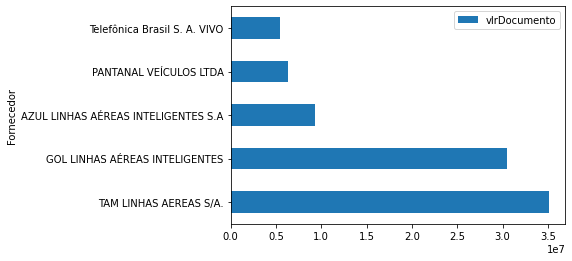

In [187]:
colunas_analisadas = ['txtCNPJCPF', 'vlrDocumento']
df = dado[colunas_analisadas]
gpcnpj = utils.soma_gastos(df).sort_values('vlrDocumento', ascending=False).reset_index()[:5].copy()

l = []

for cnpj in gpcnpj.nlargest(5, columns='vlrDocumento').txtCNPJCPF:
    l.append(utils.buscar_por_cnpj(dado, cnpj).txtFornecedor.unique()[0])


gpcnpj['Fornecedor'] = pd.Series(l)


gpcnpj[['Fornecedor', 'vlrDocumento']].set_index('Fornecedor').plot.barh()

In [167]:
utils.buscar_por_cnpj(dado, '020.128.620/0016-0').txtFornecedor

429       TAM LINHAS AEREAS S/A.
430       TAM LINHAS AEREAS S/A.
431       TAM LINHAS AEREAS S/A.
568               Latam Airlines
569               LATAM AIRLINES
                   ...          
555133           Cia Aérea - TAM
555137           Cia Aérea - TAM
555153                     LATAM
555271                     LATAM
555272                     LATAM
Name: txtFornecedor, Length: 43429, dtype: object